In [1]:
# imports 
import pandas as pd
import os 
import sys
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sys.path.append(os.path.abspath(".."))
from src.data_loader import load_data


In [2]:
location = '../data/raw/'
if not os.path.exists(location):
    os.makedirs(location)
    print("Created new directory!")
    id = 45566
    df = load_data(id=id,location=location)
else:
    print("Directory already exists!")
    df = pd.read_csv(f"{location}SantanderCustomerSatisfaction.csv")

Directory already exists!


In [3]:
df

var_0   var_1    var_2   var_3    var_4    var_5   var_6    var_7  \
0        8.9255 -6.7863  11.9081  5.0930  11.4607  -9.2834  5.1187  18.6266   
1       11.5006 -4.1473  13.8588  5.3890  12.3622   7.0433  5.6208  16.5338   
2        8.6093 -2.7457  12.0805  7.8928  10.5825  -9.0837  6.9427  14.6155   
3       11.0604 -2.1518   8.9522  7.1957  12.5846  -1.8361  5.8428  14.9250   
4        9.8369 -1.4834  12.8746  6.6375  12.2772   2.4486  5.9405  19.2514   
...         ...     ...      ...     ...      ...      ...     ...      ...   
199995  11.4880 -0.4956   8.2622  3.5142  10.3404  11.6081  5.6709  15.1516   
199996   4.9149 -2.4484  16.7052  6.6345   8.3096 -10.5628  5.8802  21.5940   
199997  11.2232 -5.0518  10.5127  5.6456   9.3410  -5.4086  4.5555  21.5571   
199998   9.7148 -8.6098  13.6104  5.7930  12.5173   0.5339  6.0479  17.0152   
199999  10.8762 -5.7105  12.1183  8.0328  11.5577   0.3488  5.2839  15.2058   

         var_8   var_9  ...  var_191  var_192  var_193  var_194  var_195  \
0      -4.9200  5.7470  ...   3.9642   3.1364   1.6910  18.5227  -2.3978   
1       3.1468  8.0851  ...   7.7214   2.5837  10.9516  15.4305   2.0339   
2      -4.9193  5.9525  ...   9.7905   1.6704   1.6858  21.6042   3.1417   
3      -5.8609  8.2450  ...   4.7433   0.7178   1.4214  23.0347  -1.2706   
4       6.2654  7.6784  ...   9.5214  -0.1508   9.1942  13.2876  -1.5121   
...        ...     ...  ...      ...      ...      ...      ...      ...   
199995 -0.6209  5.6669  ...  13.2305   3.9901   0.9388  18.0249  -1.7939   
199996 -3.6797  6.0019  ...   4.6549   0.6998   1.8341  22.2717   1.7337   
199997  0.1202  6.1629  ...   5.4414   3.1032   4.8793  23.5311  -1.5736   
199998 -2.1926  8.7542  ...   8.6587   2.7337  11.1178  20.4158  -0.0786   
199999 -0.4541  9.3688  ...   1.6893   0.1276   0.3766  15.2101  -2.4907   

        var_196  var_197  var_198  var_199  target  
0        7.8784   8.5635  12.7803  -1.0914   False  
1        8.1267   8.7889  18.3560   1.9518   False  
2       -6.5213   8.2675  14.7222   0.3965   False  
3       -2.9275  10.2922  17.9697  -8.9996   False  
4        3.9267   9.5031  17.9974  -8.8104   False  
...         ...      ...      ...      ...     ...  
199995   2.1661   8.5326  16.6660 -17.8661   False  
199996  -2.1651   6.7419  15.9054   0.3388   False  
199997   1.2832   8.7155  13.8329   4.1995   False  
199998   6.7980  10.0342  15.5289 -13.9001   False  
199999  -2.2342   8.1857  12.1284   0.1385   False  

[200000 rows x 201 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, var_0 to target
dtypes: bool(1), float64(200)
memory usage: 305.4 MB


- Spaltennamen nicht aussagekräftig
- die Features können möglicherweise einen dtype float32 bekommen, da es Speicher sparen würde und auch die Ausführungszeit reduziert; das kann man bei dem ML Abteil durchführen

In [5]:
df_tweaked = (
    df
    .assign(**{
        colname: (df[colname]).astype(np.float32) 
        for colname in df.columns if colname != "target"
    })
    
)


In [6]:
df_tweaked.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, var_0 to target
dtypes: bool(1), float32(200)
memory usage: 152.8 MB


In [7]:
max_diff = (df.select_dtypes("number") - df_tweaked.select_dtypes("number")).abs().max().max()
print("Größter Unterschied:", max_diff)

Größter Unterschied: 3.7963867214330094e-06


In [8]:
# Rundungsfehler ist sehr klein, also fast null und somit vernachlässigbar
df = df_tweaked

## EDA General
- aufschreiben, was erwähnenswert ist
  - fehlende Werte, schiefe Verteilung, normalverteilt?; In R1 die EDA in Python implementieren
- die Vorbereitung auf das ML Modell, wobei erst geklärt werden muss, wer welches Modell übernimmt
  - wie werden fehlende Werte imputiert (mean/median, mfv, ...)
  - encoding und transformation von kategorischen und kontinuierlichen Variablen
- gibt es wichtige Features, weil es stark das Resultat beeinflusst

### Kategorische Features
- Visualisierungen: Balken, Kuchen, Begründung in meiner BSc nachschauen
- einzelne Features mit Output vergleichen, um zu sehen wie viel Einfluss es auf das Ergebnis hat
- die Korrelationen zwischen den Features anzeigen, da korrelierte Features für das ML Modell keine weiteren Information bietet und die Rechzeit erhöht, da es mehr Features berücksichtigen muss sowie ?Die Pred verschlechtern kann/wird? 

### Kontinuierliche Features
- Visualisierungen: Histo, Box, Violin, Begründung in meiner BSc nachschauen
- einzelne Features mit Output vergleichen, um zu sehen wie viel Einfluss es auf das Ergebnis hat
- die Korrelationen zwischen den Features anzeigen, da korrelierte Features für das ML Modell keine weiteren Information bietet und die Rechzeit erhöht, da es mehr Features berücksichtigen muss sowie ?Die Pred verschlechtern kann/wird? 

In [9]:
df.describe()

var_0          var_1          var_2          var_3  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       10.679914      -1.627622      10.715190       6.796530   
std         3.040051       4.050044       2.640894       2.043319   
min         0.408400     -15.043400       2.117100      -0.040200   
25%         8.453850      -4.740025       8.722475       5.254075   
50%        10.524750      -1.608050      10.580000       6.825000   
75%        12.758200       1.358625      12.516700       8.324100   
max        20.315001      10.376800      19.353001      13.188300   

               var_4          var_5          var_6          var_7  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       11.078333      -5.065317       5.408949      16.545851   
std         1.623150       7.863266       0.866607       3.418076   
min         5.074800     -32.562599       2.347300       5.349700   
25%         9.883175     -11.200350       4.767700      13.943800   
50%        11.108250      -4.833150       5.385100      16.456800   
75%        12.261125       0.924800       6.003000      19.102900   
max        16.671400      17.251600       8.447700      27.691799   

               var_8          var_9  ...        var_190        var_191  \
count  200000.000000  200000.000000  ...  200000.000000  200000.000000   
mean        0.284162       7.567236  ...       3.234439       7.438409   
std         3.332633       1.235070  ...       4.559922       3.023272   
min       -10.505500       3.970500  ...     -14.093300      -2.691700   
25%        -2.317800       6.618800  ...      -0.058825       5.157400   
50%         0.393700       7.629600  ...       3.203600       7.347750   
75%         2.937900       8.584425  ...       6.406200       9.512525   
max        10.151300      11.150600  ...      18.440901      16.716499   

             var_192        var_193        var_194        var_195  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        1.927838       3.331773      17.993788      -0.142088   
std         1.478423       3.992030       3.135162       1.429372   
min        -3.814500     -11.783400       8.694400      -5.261000   
25%         0.889775       0.584600      15.629800      -1.170700   
50%         1.901300       3.396350      17.957950      -0.172700   
75%         2.949500       6.205800      20.396525       0.829600   
max         8.402400      18.281799      27.928801       4.272900   

             var_196        var_197        var_198        var_199  
count  200000.000000  200000.000000  200000.000000  200000.000000  
mean        2.303335       8.908157      15.870723      -3.326537  
std         5.454369       0.921625       3.010946      10.438015  
min       -14.209600       5.960600       6.299300     -38.852798  
25%        -1.946925       8.252800      13.829700     -11.208475  
50%         2.408900       8.888200      15.934050      -2.819550  
75%         6.556725       9.593300      18.064724       4.836800  
max        18.321501      12.000400      26.079100      28.500700  

[8 rows x 200 columns]

In [10]:
df.sample(10)

var_0   var_1    var_2    var_3    var_4    var_5   var_6  \
183574  13.4088  2.1981  14.4760   9.3679   9.6562  -5.2934  4.5736   
22041    9.8528  6.7318  10.2350   7.2495  12.6363   4.1599  6.8648   
160627  11.0615 -1.4335  15.0879   4.6877   8.9169  -8.7389  5.6632   
155704  12.1663 -4.4771  16.5811   6.0346  11.8561 -11.1639  6.5494   
51684   12.5522 -4.4806  15.9674   7.4374   9.6917  -5.1029  4.7665   
187521  11.2492 -3.0619   8.3827   2.6436  11.0743   3.2503  4.9768   
39018   12.0636 -5.3160   8.0551  10.1227   8.0820   1.3009  5.9998   
34303   10.9269  3.0714   9.4932   3.9916   8.5530 -13.1484  4.9943   
140345  12.5107  1.6339   9.2408   6.6017  10.5336 -11.2212  6.5480   
173712   7.1018 -1.4496  10.7553   4.9597  12.9021   4.2607  5.0746   

            var_7   var_8   var_9  ...  var_191  var_192  var_193    var_194  \
183574  15.207700  6.0060  8.1617  ...   8.4560   1.9207   4.8310  20.908800   
22041   16.818600  0.4104  6.5968  ...   6.4983   3.5831   4.7782  17.432899   
160627  13.260400  5.5813  8.9586  ...   4.8684   0.8129   6.6265  18.450600   
155704  14.458100  5.3571  6.0703  ...   3.9933   4.4842   5.1844  16.185600   
51684   13.689800 -0.8888  7.1279  ...   3.5556   3.3302   2.3767  22.528099   
187521  15.095400  1.2206  7.0007  ...   8.4812   0.2198   9.7338  17.172100   
39018   18.192101  1.9913  6.0067  ...   8.8467   1.5114   8.9463  19.832800   
34303   12.063600 -0.3822  9.1787  ...   8.5054   0.2746   0.7160  20.667000   
140345  17.280800  4.0794  9.2228  ...   4.2210   5.5901   0.8143  17.812201   
173712  21.572399  2.6214  6.0268  ...   7.7193   1.9564   1.5263  19.606300   

        var_195  var_196  var_197    var_198  var_199  target  
183574   0.3799  -5.2311   8.7577  11.203100 -14.8183   False  
22041   -0.5174   5.4237   8.0579  13.798300  -9.0373   False  
160627  -0.5104  -1.3698   9.6985  17.076099   9.0969   False  
155704  -2.6559 -11.0854   8.2377  15.445800 -10.9758   False  
51684   -0.1202  -7.0634   9.2259  16.982100  -1.9691   False  
187521   0.1534  -2.0300   8.3659  16.870501   1.7661   False  
39018    0.1041   3.9334  10.3599  21.346701   1.9052   False  
34303   -1.0740   6.7837   7.7099  11.778400   8.1373   False  
140345   0.4330  11.2463   8.5182  11.358500 -10.8764   False  
173712  -0.2890   4.0826   6.9558  15.812400 -12.4470   False  

[10 rows x 201 columns]

In [11]:
df.min(numeric_only=True).min(), df.max(numeric_only=True).max()

(np.float32(-90.2525), np.float32(74.0321))

In [53]:
df.isna().sum().sum()

np.int64(0)

<Axes: ylabel='Count'>

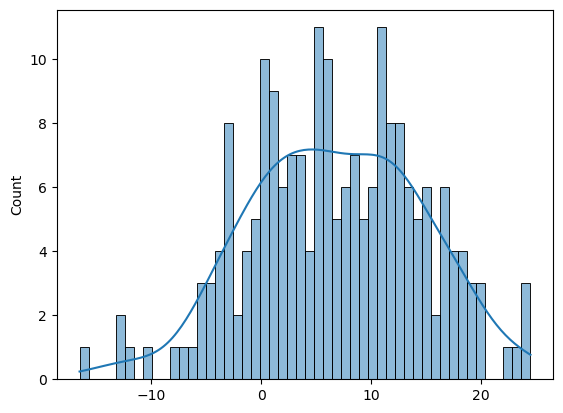

In [60]:
sns.histplot(df.mean(), bins=50, kde=True)

<Axes: ylabel='Count'>

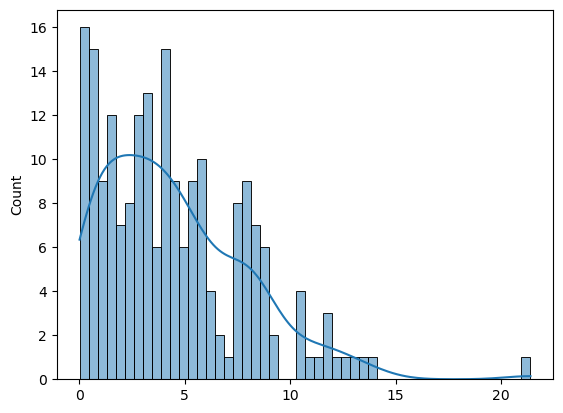

In [61]:
sns.histplot(df.std(), bins=50, kde=True)

<Axes: ylabel='Count'>

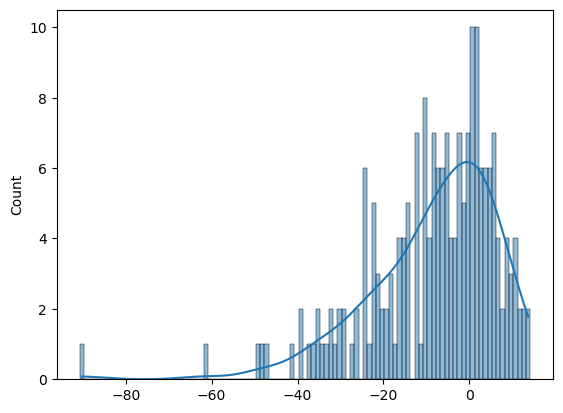

In [62]:
sns.histplot(df.min(), bins=50, kde=True)

<Axes: ylabel='Count'>

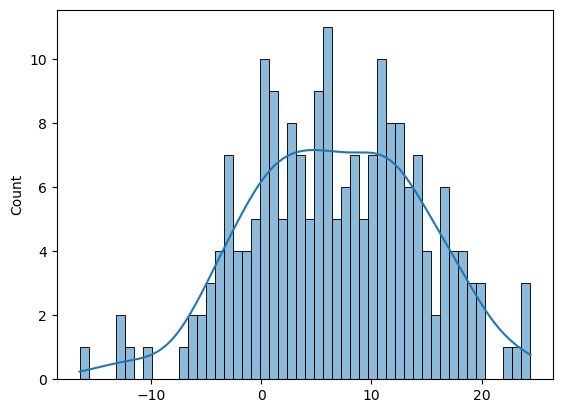

In [63]:
sns.histplot(df.median(), bins=50, kde=True)

<Axes: ylabel='Count'>

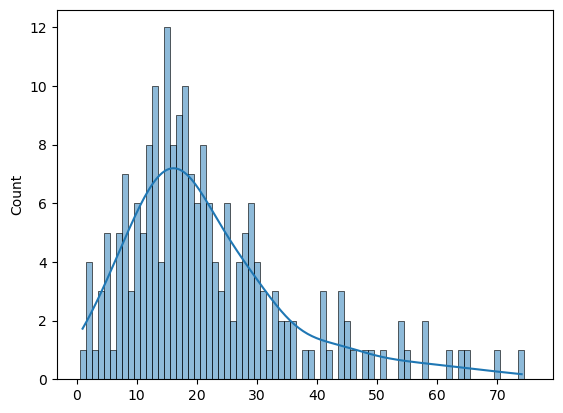

In [64]:
sns.histplot(df.max(), bins=50, kde=True)

- Auf dem ersten Blick könnte man float32 nehmen, da es präzise genug ist
- außerdem reichen die Werte nur von -90.2525 bis 74.0321
- es gibt keine fehlende Werte
- der Mittelwert und Median sehen sich sehr ähnlich aus, womöglich symmetrisch und normalisiert
- die Verteilung der Standardabweichung sieht rechtsschief aus und hat somit kleine Variabilität bzw. wenig Informationen für das spätere ML Modell
- die Verteilung von den maximalen und minimalen Werten zeigen mögliche Ausreißer oder Daten mit hoher Information, wenn es mit einer relativen hohen Standardabweichung einhergeht


#### Verteilung

<Axes: ylabel='Count'>

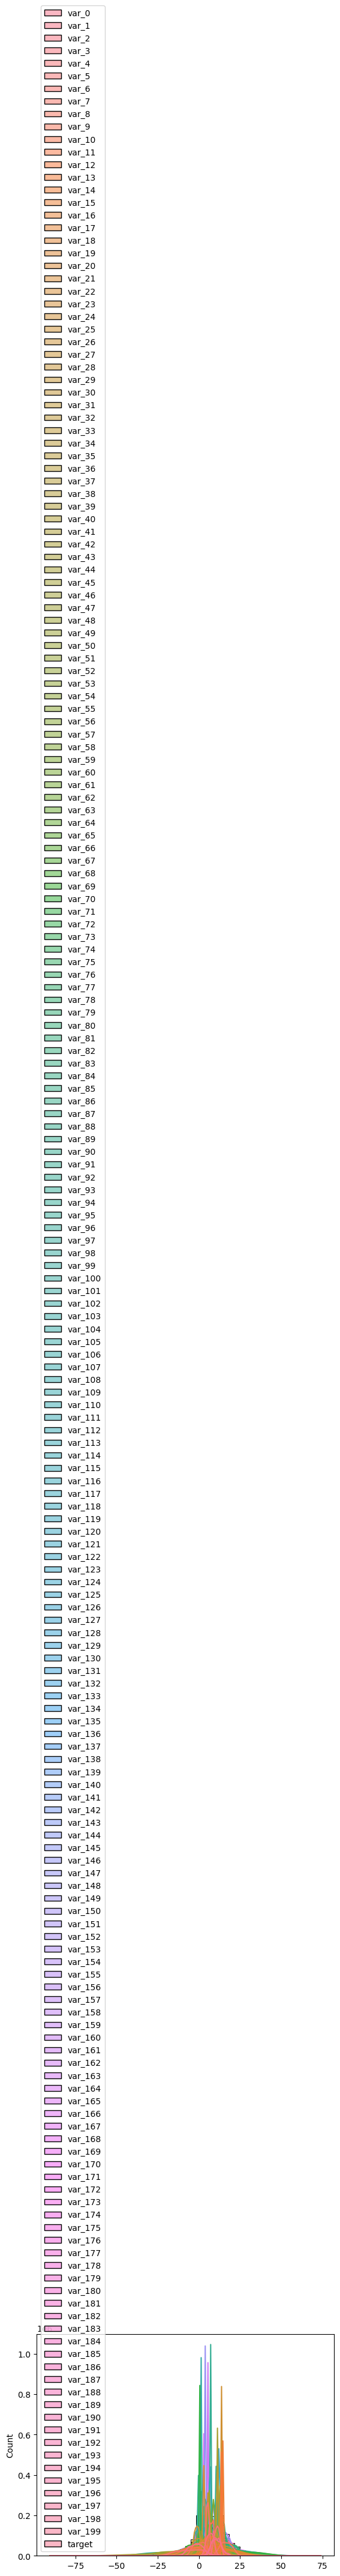

In [93]:
sns.histplot(df, bins=50, kde=True)

<Axes: xlabel='var_0', ylabel='Count'>

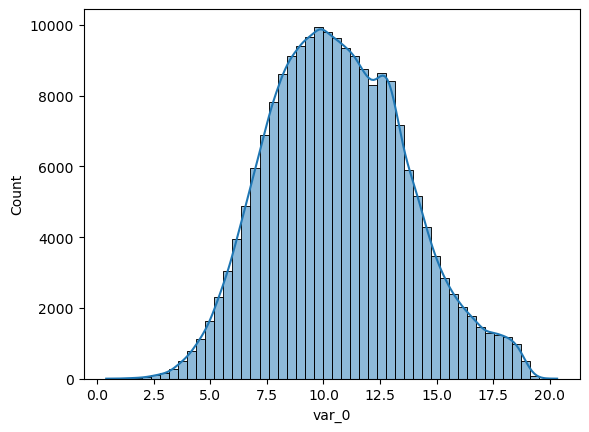

In [12]:
sns.histplot(df['var_0'], bins=50, kde=True)

<Axes: xlabel='var_0', ylabel='Count'>

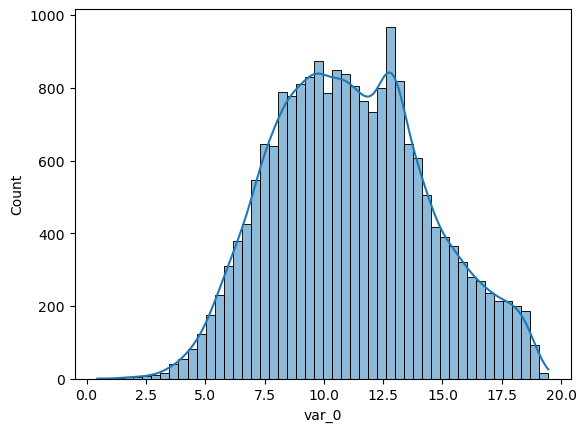

In [18]:
sns.histplot(df['var_0'][df["target"]==1], bins=50, kde=True)

<Axes: xlabel='var_1', ylabel='Count'>

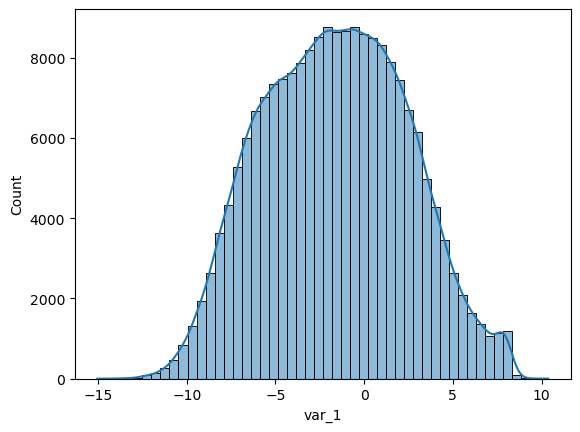

In [13]:
sns.histplot(df['var_1'], bins=50, kde=True)

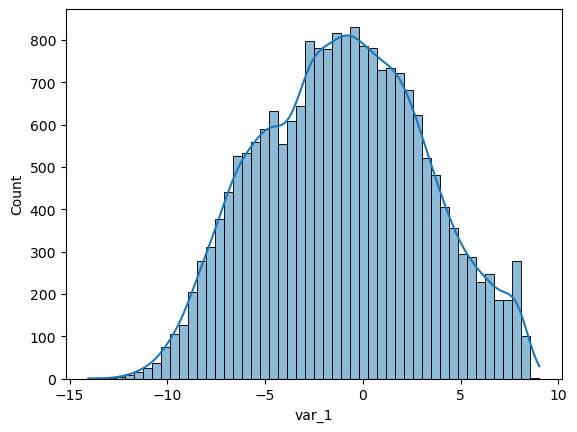

In [ ]:
sns.histplot(df['var_1'][df["target"]==1], bins=50, kde=True);

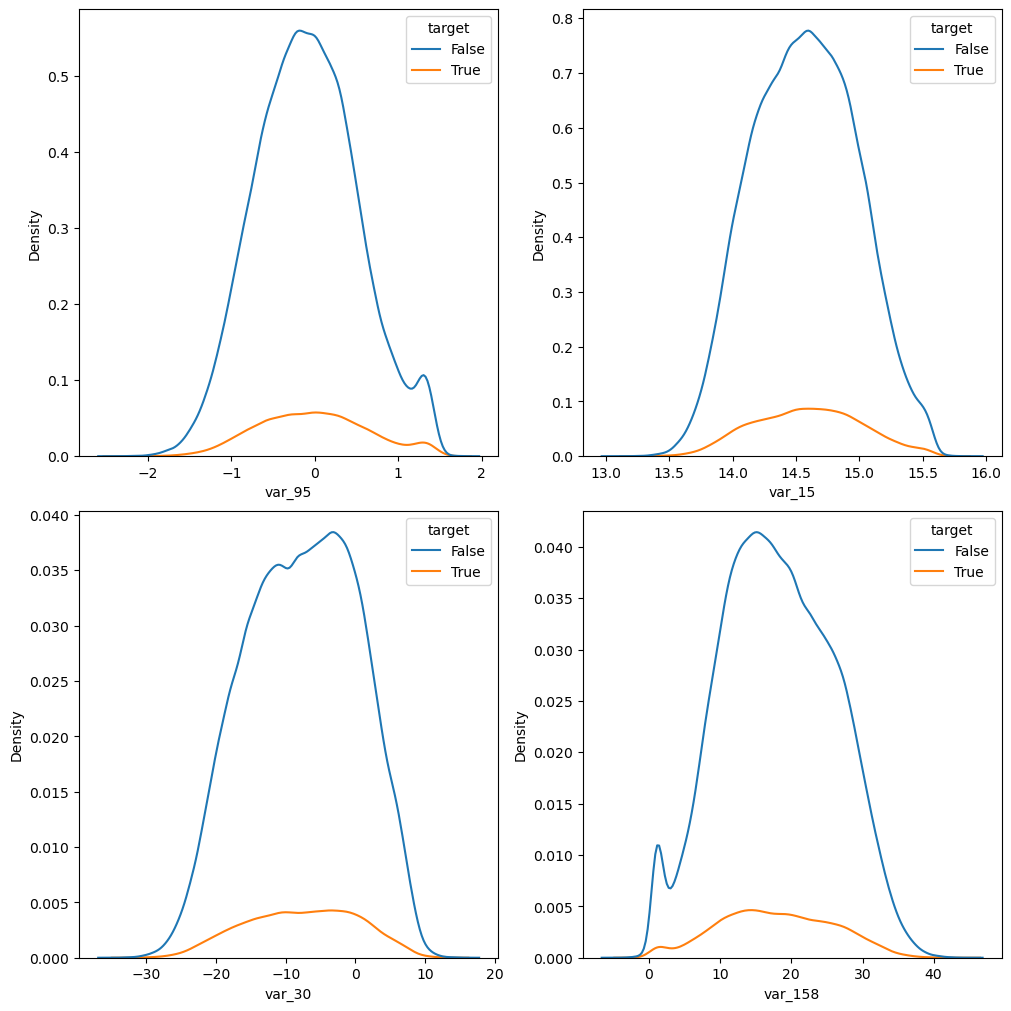

In [56]:
#vorher
fig ,axes = plt.subplots(2, 2, figsize = (10, 10), layout="constrained")
np.random.seed(42)
col_names = np.random.choice(df.columns, size=4, replace=False)

# for (i,j), col in zip(np.ndindex(2, 2), col_names):
#     sns.histplot(df[col], bins=50, kde=True, ax=axes[i,j])
#     axes[i,j].set_title(col)

for ax, col in zip(axes.ravel(), col_names):
    sns.kdeplot(df, x=col, hue="target", ax=ax)

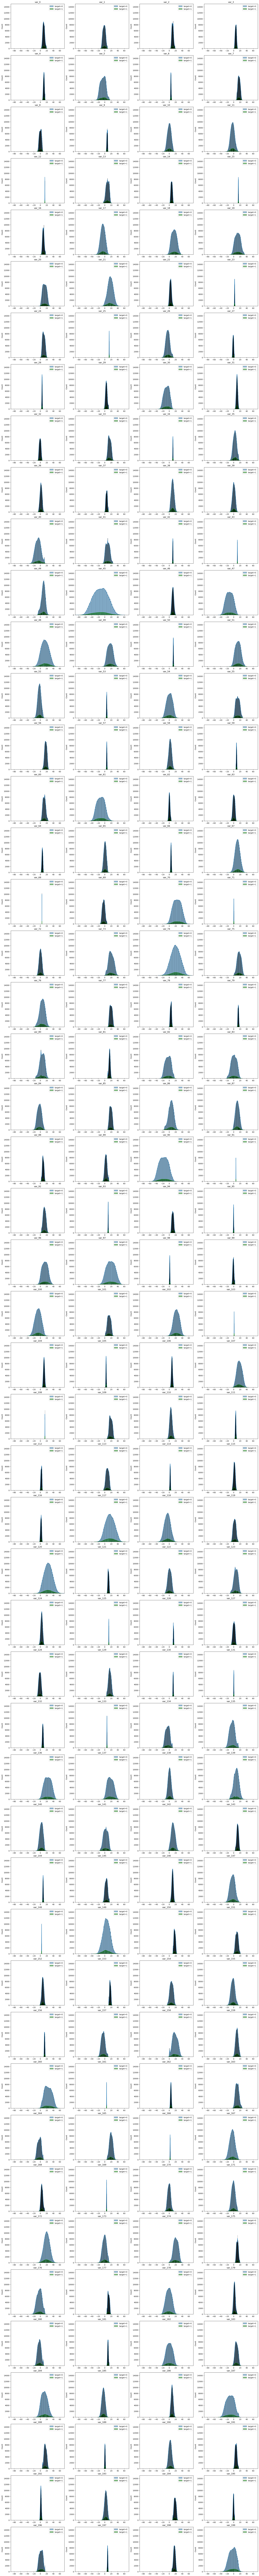

In [78]:
rows, cols = 50, 4
fig ,axes = plt.subplots(rows, cols, figsize = (20, 200), layout="constrained")

for i, col in enumerate(df.columns[:rows*cols]):
    idx = i // cols
    jdx = i % cols

    ax = axes[idx][jdx]

    sns.histplot(df[col][df["target"]==0], bins=50, kde=True, ax=ax, alpha=0.5, label="target=0")
    sns.histplot(df[col][df["target"]==1], bins=50, kde=True, ax=ax, color="green", alpha=0.5, label="target=1")
    ax.set_title(col)
    ax.legend()
    ax.set_xlabel("")
    ax.set_xlim(-90.2525, 74.0321)
    ax.set_ylim(0, 15000)

# for ax, col in zip(axes.ravel(), df.columns[:rows*cols]):
#     sns.kdeplot(df, x=col, hue="target", ax=ax)    

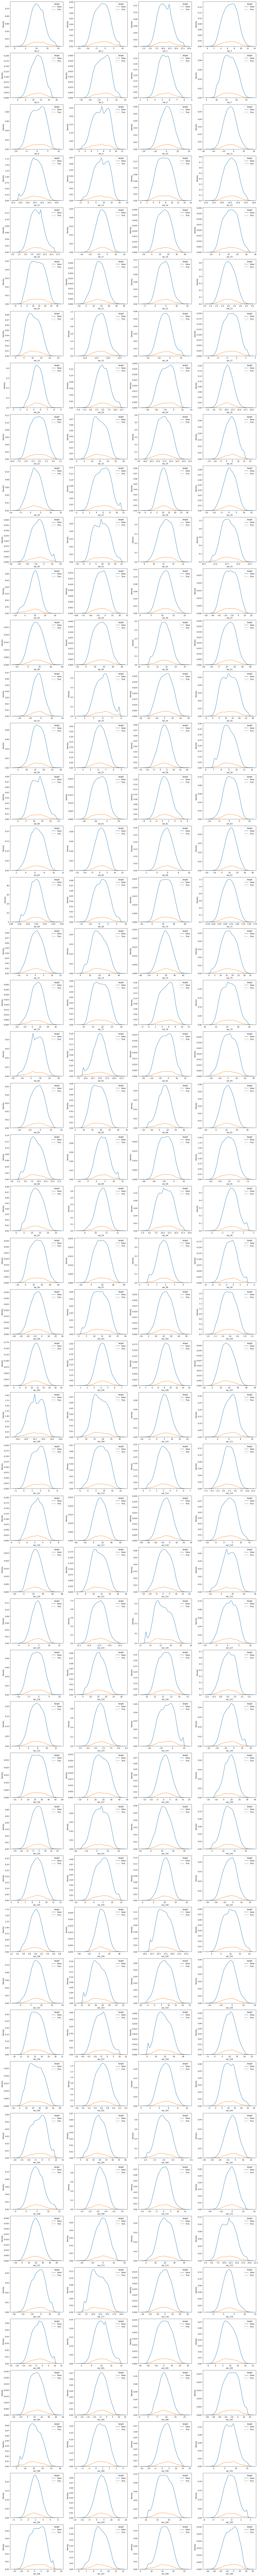

In [57]:
rows, cols = 50, 4
fig ,axes = plt.subplots(rows, cols, figsize = (20, 200), layout="constrained")

# for i, col in enumerate(df.columns[:rows*cols]):
#     idx = i // cols
#     jdx = i % cols

#     ax = axes[idx][jdx]

#     sns.histplot(df[col][df["target"]==0], bins=50, kde=True, ax=ax, alpha=0.5, label="target=0")
#     sns.histplot(df[col][df["target"]==1], bins=50, kde=True, ax=ax, color="green", alpha=0.5, label="target=1")
#     ax.set_title(col)
#     ax.legend()
#     ax.set_xlabel("")

for ax, col in zip(axes.ravel(), df.columns[:rows*cols]):
    sns.kdeplot(df, x=col, hue="target", ax=ax)    

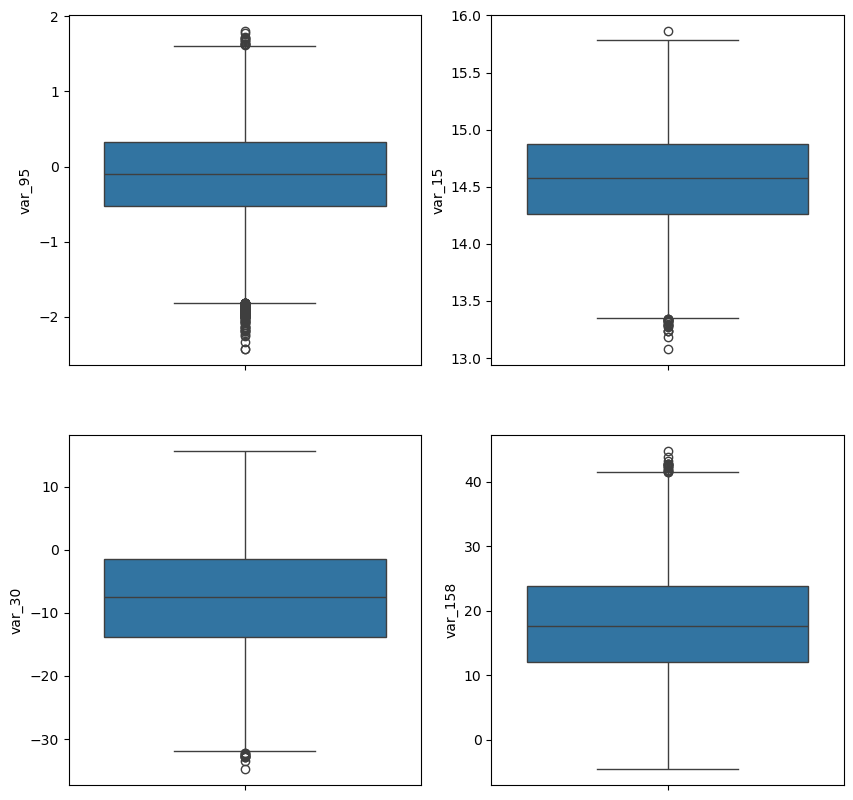

In [ ]:
fig ,axes = plt.subplots(2, 2, figsize = (10, 10), layout="constrained")
np.random.seed(42)
col_names = np.random.choice(df.columns, size=4, replace=False)

for (i,j), col in zip(np.ndindex(2, 2), col_names):
    sns.boxplot(df[col], ax=axes[i,j])

- var_0 bei beiden Klassen sehen ähnlich zur Normalverteilung aus, wobei sie nach rechts verschoben sind
- var_1 bei beiden Klassen sehen ähnlich zur Normalverteilung aus, wobei sie nach links verschoben sind
- die vier randomisierten Plots sehen auch ähnlich zur Normalverteilung aus mit einer entsprechenden Verschiebung
- der grobe Überblick über alle Plots sehen auch ähnlich zur Normalverteilung aus mit entsprechenden Verschiebungen
- Vermutung: die Daten könnten normalisiert worden sein
- Werden die Daten mir gleicher Achsenskalierung geplottet, werden bei manchen Spalten eine geringe Varianz erkennbar und womöglich ein unwichtiges Feature oder es liegt der Normalisierung zu Grunde
- Boxplots über vier zufällige Spalten werden sich, wegen der Symmetriebedingung von der Normalverteilung angeschaut und rein aus dem Augenmaß heraus, sehen sie normalverteilt aus

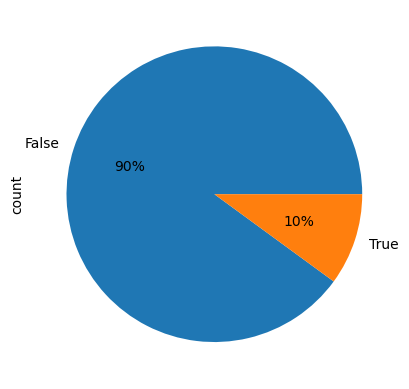

In [38]:
df["target"].value_counts().plot.pie(autopct="%.0f%%");

- Nur ungefähr ein 1/10 aller Samples sind wahr. Für die initiale Bearbeitung nur einen Bruchteil des Datensatzes verwenden.

In [39]:
df_mini, _ = train_test_split(
    df,
    train_size= 0.1,
    stratify=df["target"],
    random_state=42
)

In [40]:
df_mini.shape

(20000, 201)

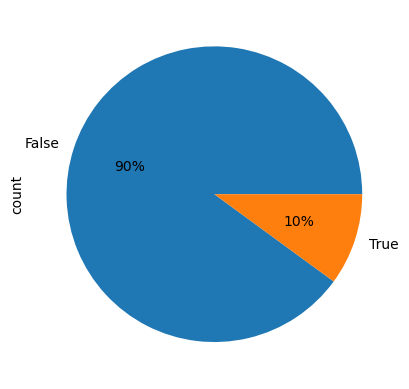

In [41]:
df_mini["target"].value_counts().plot.pie(autopct="%.0f%%");

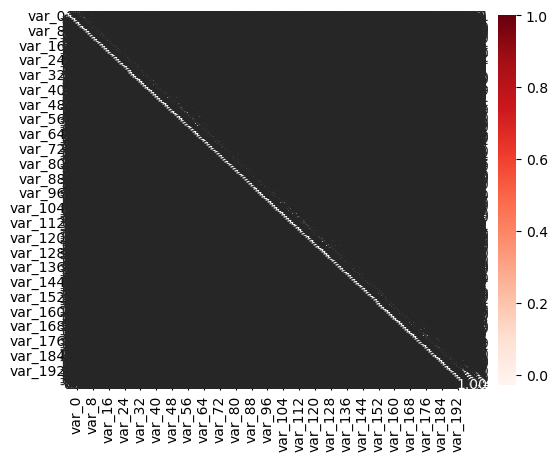

In [42]:
sns.heatmap(df_mini.select_dtypes("number").corr(), annot = True, fmt=".2f", cmap = "Reds");

In [43]:
df_corr = df_mini.select_dtypes("number").corr()

In [44]:
strong_corr = df_corr[(df_corr.abs() > 0.0) & (df_corr.abs() < 1.0)]

In [45]:
strong_corr.notna().sum().sum()

np.int64(39800)

In [ ]:
corr_pairs = df_corr.unstack()

corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]

top3 = corr_pairs.reindex(corr_pairs.abs().sort_values(ascending=False).index).head(5)

print(top3)


var_121  var_151    0.028942
var_151  var_121    0.028942
var_104  var_195   -0.028243
var_195  var_104   -0.028243
var_35   var_77     0.027681
dtype: float64
<class 'pandas.core.series.Series'>
MultiIndex: 39800 entries, ('var_0', 'var_1') to ('var_199', 'var_198')
Series name: None
Non-Null Count  Dtype  
--------------  -----  
39800 non-null  float64
dtypes: float64(1)
memory usage: 1.5+ MB


In [87]:
#pd.set_option("display.max_rows", None)
alle_werte = df.values.ravel()
haeufigkeiten = pd.Series(alle_werte).value_counts()
print(haeufigkeiten)
#pd.reset_option("display.max_rows")

 False        180047
 True          20265
 5.0215         1293
 5.0179         1286
 5.0209         1279
               ...  
-21.917601         1
 49.8354           1
-32.558899         1
-33.564899         1
 55.379799         1
Name: count, Length: 828834, dtype: int64


In [86]:
#bins = [-np.inf, 0, 4.5, 9, np.inf]
#buckets = pd.cut(alle_werte, bins=bins)
buckets = pd.qcut(alle_werte, q=5)
buckets_haeufigkeiten = buckets.value_counts().sort_index()
print(buckets_haeufigkeiten)

(-90.254, 0.0782]    8040050
(0.0782, 4.789]      8039988
(4.789, 8.849]       8040096
(8.849, 13.735]      8040017
(13.735, 74.032]     8039849
Name: count, dtype: int64


In [71]:
unique_counts = df.nunique().sort_values(ascending=False)
print(unique_counts)

var_45     169968
var_117    164469
var_74     161058
var_61     159369
var_97     158739
            ...  
var_103      9376
var_108      8525
var_91       7962
var_68        451
target          2
Length: 201, dtype: int64


In [90]:
df.round(1).nunique().sort_values(ascending=False)

var_45     1276
var_74      932
var_117     849
var_120     798
var_90      757
           ... 
var_103      13
var_108      11
var_91       11
target        2
var_68        1
Length: 201, dtype: int64

In [92]:
pd.Series(df.round(1).values.ravel()).value_counts()


 5.0          382638
 False        322255
 5.6          237273
 5.7          236821
 5.8          232647
               ...  
 74.0              1
 67.0              1
-74.5              1
-75.900002         1
 66.0              1
Name: count, Length: 1424, dtype: int64

In [73]:
for col in df.columns:
    print(f"\nSpalte: {col}")
    print(df[col].value_counts().head(5))


Spalte: var_0
var_0
10.6829    11
8.6649     11
13.0656    11
8.7260     10
9.5114     10
Name: count, dtype: int64

Spalte: var_1
var_1
-2.1515    10
-1.1853    10
-2.4313    10
-2.5753    10
-0.2407     9
Name: count, dtype: int64

Spalte: var_2
var_2
9.1497     12
12.5826    11
12.2605    11
11.4556    11
7.6981     11
Name: count, dtype: int64

Spalte: var_3
var_3
6.8029    15
6.0463    13
6.7984    13
6.8176    12
7.5891    12
Name: count, dtype: int64

Spalte: var_4
var_4
10.8911    15
11.3742    14
10.9037    14
11.0683    14
8.5373     13
Name: count, dtype: int64

Spalte: var_5
var_5
-12.7817    7
-6.0377     7
 1.6350     7
-9.1270     7
-12.1148    7
Name: count, dtype: int64

Spalte: var_6
var_6
5.1153    22
5.7649    21
5.3422    21
6.0012    21
5.6477    20
Name: count, dtype: int64

Spalte: var_7
var_7
18.996599    11
17.253201    10
16.711599    10
17.527100     9
14.107400     9
Name: count, dtype: int64

Spalte: var_8
var_8
-2.2274    11
 2.5633    10
-0.2945    10
-

In [76]:
print(df.duplicated().sum(), "Duplikate gefunden")

0 Duplikate gefunden
